In [29]:
import pandas as pd
import sys
sys.path.append('../src/')
%matplotlib inline
import numpy as np
from data.data_loader import load_data , spilit_refit_test
from utils.visual_functions import *
from data.load_data import *
fig_path = "../figures/"

In [67]:
x, y, z= load_data("../data/", data_type="training", data="ukdale", denoise=True)

Load training data


In [68]:
p = np.load("../data/ukdale/training/powers.npy")

In [69]:
appliance_labels={'kettle':"KT", 'fridge':"FRZ", 'dishwasher':"DW", 'washingmachine':"WM", 'microwave':"MW"}

In [70]:
train, validation, test = spilit_refit_test(z)

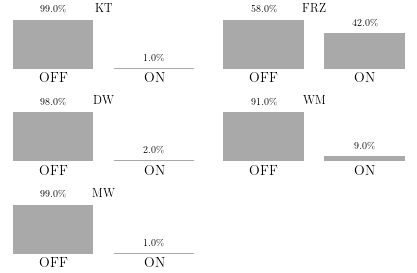

In [71]:
fig = plt.figure(figsize=(6, 4))
for i, app in enumerate(list(ukdale_appliance_data.keys())):
    ax  = fig.add_subplot(3,2,i+1)
    ax  = get_label_distribution(ax, validation[:,i], title=appliance_labels[app])
fig.tight_layout()

## Appliance profiles

In [72]:
fig = figure(columns=1)
plt.plot(z[4600:4753+1000, 3], color=colors[2])
plt.yticks([0,1])
plt.ylabel("$s(t)$")
plt.xlabel("sample $T$")
plt.tight_layout()
savefig(fig_path+"dishwasher_state", format=".pdf")
fig = figure(columns=1)
plt.plot(y[4600:4753+1000, 3]*700 +700, color=colors[1])
plt.ylabel("$y(t)$")
plt.xlabel("sample $T$")
plt.tight_layout()
savefig(fig_path+"dishwasher_power", format=".pdf")

In [73]:
4753+1000 - 4500

1253

### Input sequences

In [85]:
import torch
from data.data_loader import  Dataset
data = Dataset(x[4500:4753+1000], y[4500:4753+1000], z[4500:4753+1000], 99)
loader = torch.utils.data.DataLoader(data,batch_size=1253)

In [86]:
batch = next(iter(loader))

In [114]:
fig = figure(columns=1)
plt.plot(batch[0].squeeze());
plt.ylabel("$\mathbf{x}_w$")
plt.xlabel("sample $T$")
plt.tight_layout()
savefig(fig_path+"input_sequence", format=".png")

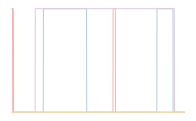

In [121]:
fig = figure(columns=1)
for idx, app in enumerate(list(ukdale_appliance_data.keys())):
    plt.plot(batch[2][:, idx], label=appliance_labels[app]);
plt.ylabel("${s}(t) $")
plt.yticks([0,1])
plt.xlabel("sample $T$")

#plt.legend()
#plt.tight_layout()
#savefig(fig_path+"state_pred", format=".png")

In [117]:
fig = figure(columns=1)
for idx, app in enumerate(list(ukdale_appliance_data.keys())):
    plt.plot(batch[1][:, idx] * ukdale_appliance_data[app]['std'] + ukdale_appliance_data[app]['mean'],\
             label=appliance_labels[app]);
plt.ylabel("${y}(t) W$")
plt.xlabel("sample $T$")
ax = plt.gca()
#plt.legend()
plt.tight_layout()
savefig(fig_path+"power_pred", format=".png")

In [ ]:
x = data.mains.values-np.percentile(data.mains.values, 1)
x = np.where(x<0, 0, x)
mains = quantile_filter(50, x, 50)

In [ ]:
plt.plot(data.sub_mains.iloc[:3000])
plt.plot(x[:3000])
plt.plot(mains[:3000])

In [ ]:
plt.plot(xp[:1000])
#plt.plot(x[:1000])
plt.plot(y[:1000, 0])

In [ ]:
import torch
class Dataset(torch.utils.data.Dataset):
    def __init__(self,  inputs, targets, states,  seq_len=99):
        self.inputs = inputs
        self.targets = targets
        self.states  = states
        seq_len = seq_len  if seq_len% 2==0 else seq_len+1
        self.seq_len = seq_len
        self.len = self.inputs.shape[0] - self.seq_len
        self.indices = np.arange(self.inputs.shape[0])
    def __len__(self):
        'Denotes the total number of samples'
        return self.len
    
    def get_sample(self, index):
        indices = self.indices[index:index + self.seq_len]
        #indices = self.indices[index : index + self.seq_len]
        inds_inputs=sorted(indices[:self.seq_len])
        inds_targs=sorted(indices[self.seq_len-1:self.seq_len])

        return self.inputs[inds_inputs], self.targets[inds_targs], self.states[inds_targs]

    def __getitem__(self, index):
        inputs, target, state = self.get_sample(index)
        return torch.tensor(inputs).unsqueeze(-1).float(), torch.tensor(target).float().squeeze(), torch.tensor(state).long().squeeze()
    

    
test_data = Dataset(aggregated[:300], data[:300], states[:300])
#loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False, pin_memory=True, num_workers=4)
#input, targ, state=next(iter(loader))

In [ ]:
x, y,z=next(iter(test_data))

In [ ]:
x,y,z=test_data.get_sample(202)
print(x.shape)

In [ ]:
times = []
indices = np.ra
for index in range(0, 300, 100):
    